In [1]:
import pytorch_lightning as pl
from torch import squeeze
from torch.optim import Adam
from torch.utils.data import DataLoader
import torchvision
from disent.data.groundtruth._multimodalxysquares import MultimodalXYSquaresData
from disent.data.groundtruth._xysquares import XYSquaresData
from disent.dataset.groundtruth import GroundTruthDataset
from disent.frameworks.vae import BetaVae
from disent.metrics import metric_dci, metric_mig
from disent.model.ae import EncoderConv64, DecoderConv64, AutoEncoder
from disent.schedule import CyclicSchedule
from disent.transform import ToStandardisedTensor
import matplotlib.pyplot as plt

data_old = XYSquaresData()
dataset_old = GroundTruthDataset(data_old, transform=ToStandardisedTensor())
dataloader_old = DataLoader(dataset=dataset_old, batch_size=1, shuffle=False)
iter_loader_old = iter(dataloader_old)

data_new = MultimodalXYSquaresData()
dataset_new = GroundTruthDataset(data_new, transform=ToStandardisedTensor())
dataloader_new = DataLoader(dataset=dataset_new, batch_size=1, shuffle=False)
iter_loader_new = iter(dataloader_new)

{'x_orig': 0, 'y_orig': 0}
{'x_mod': 0, 'y_mod': 0}
{'x_orig': 0, 'y_orig': 8}
{'x_mod': 0, 'y_mod': 8}
{'x_orig': 32, 'y_orig': 0}
{'x_mod': 32, 'y_mod': 0}


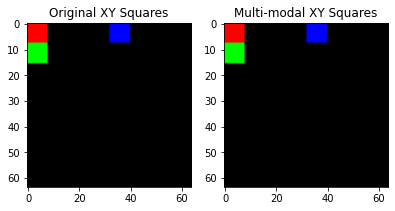

In [98]:
x = next(iter_loader_old)
x_mod= next(iter_loader_new)
fig = plt.figure()
fig.set_figheight(10)
fig.set_figwidth(10)

#Original XY Squares
sub1 = fig.add_subplot(1,3,1)
sub1.set_title("Original XY Squares")
plt.imshow(squeeze(x['x_targ'][0]).permute(1, 2, 0), 
cmap= 'hot')

#Multi-modal XY Squares
sub2 = fig.add_subplot(1,3,2)
sub2.set_title("Multi-modal XY Squares")
plt.imshow(squeeze(x_mod['x_targ'][0]).permute(1, 2, 0), cmap = 'hot')

In [11]:
import PIL
for num, x in enumerate([x1,x2]):
    img = PIL.Image.open(x)
    plt.subplot(rows,6,num+1)
    plt.title(x.split('.')[0])
    plt.axis('off')
    plt.imshow(img)

NameError: name 'x1' is not defined